In [ ]:
import scipy.integrate 
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *
import time

**Постановка задачи**

Посчитать интеграл от функции с заданной точностью



In [ ]:
def own_integrate(function, step = 0.01, start = 2, stop = 5):
    left = start
    right = start + step
    cur_ans = 0
    while (right < stop):
        cur_ans += function((left + right) / 2)
        left, right = right, right + step
    cur_ans *= step
    return cur_ans

In [ ]:
f_string = input('Введите функцию в питоновской форме записи, в качестве переменной впишите x: ')
eps = float(input('Требуемая точность: '))
points = list(map(float, input('Левая и правая границы интегрирования через пробел ').split()))

t0 = time.time()
h = eps ** (1/4)
integral_n = -10000000000000000000
integral_2n = 10000000000000000000
cnt = 0
while ((abs(integral_n - integral_2n) >= eps or cnt <= 5) and cnt < 10000):
    integral_n = integral_2n
    integral_2n = own_integrate(lambda x: eval(f_string), h, points[0], points[1])
    h /= 2
    cnt += 1
t_own = time.time()
programm_count = scipy.integrate.quad(lambda x: eval(f_string), points[0], points[1])[0]
t_in = time.time() - t_own
t_own -= t0
print(f'Ответ программы: {integral_2n}, ответ встроенной библиотеки {programm_count}')
print(f'Время мое: {t_own}, время питона: {t_in}')

Введите функцию в питоновской форме записи, в качестве переменной впишите x: exp(-x**2/0.00001)
Требуемая точность: 0.0001
Левая и правая границы интегрирования через пробел -0.5 0.5
Ответ программы: 0.00560499121639793, ответ встроенной библиотеки 0.005604991216397952
Время мое: 0.4747178554534912, время питона: 0.08033990859985352


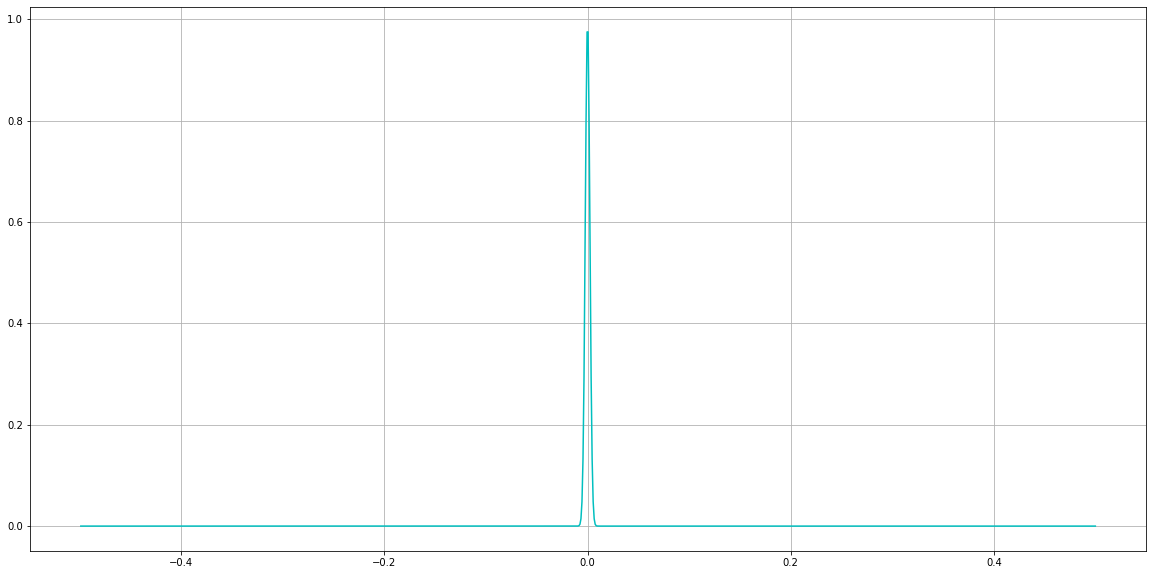

In [ ]:
f = lambda x: eval(f_string)
plt.figure(figsize = (20, 10))
plt.grid()
plt.plot(np.linspace(points[0], points[1], 1000)[1:], [f(el) for el in np.linspace(points[0], points[1], 1000)[1:]], color = 'c')

**Постановка задачи**

Найти производную функции и вывести таблицы со значениями

In [ ]:
def own_deriv(function, x, dx = 0.0001):
    print
    return (function(x + dx) - function(x - dx)) / (2 * dx)

In [ ]:
f_string = input('Введите функцию в питоновской форме записи, в качестве переменной впишите x: ')
step = float(input('Требуемый шаг: '))
points = list(map(float, input('Левая и правая границы через пробел ').split()))

func = lambda x: eval(f_string)
print("%-8s%-7s%-7s%-7s" % ('N',  'x', 'f(x)', "f'(x)"))
n = 1

t0 = time.time()
cur_point = points[0]
xv = []
fx = []
dfx = []
while (cur_point <= points[1]):
    print(cur_point, func(cur_point))

    #print("%-8d %-7.2f %-7.2f %-7.2f" % (n, cur_point, func(cur_point), own_deriv(func, cur_point)))
    xv.append(cur_point)
    fx.append(func(cur_point))
    dfx.append(own_deriv(func, cur_point))
    n += 1
    cur_point += step

t1 = time.time()

Введите функцию в питоновской форме записи, в качестве переменной впишите x: exp(-x**2/0.00000001)
Требуемый шаг: 0.001
Левая и правая границы через пробел -0.5005 0.5005
N       x      f(x)   f'(x)  
-0.5005 2.34942452202662e-10879088
-0.49949999999999994 6.59404369949404e-10835659
-0.49849999999999994 2.56121340075374e-10792316
-0.49749999999999994 1.37671273362359e-10749060
-0.49649999999999994 1.02410506530682e-10705891
-0.49549999999999994 1.05426385406619e-10662809
-0.49449999999999994 1.50195782800743e-10619814
-0.49349999999999994 2.96121390471248e-10576906
-0.49249999999999994 8.07951777289760e-10534085
-0.49149999999999994 3.05073665790289e-10491350
-0.49049999999999994 1.59414425473446e-10448702
-0.48949999999999994 1.15280045339142e-10406141
-0.48849999999999993 1.15367711191670e-10363667
-0.48749999999999993 1.59778387543898e-10321280
-0.48649999999999993 3.06235412828399e-10278980
-0.48549999999999993 8.12262506264132e-10236767
-0.48449999999999993 2.98154262311810e-10194

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


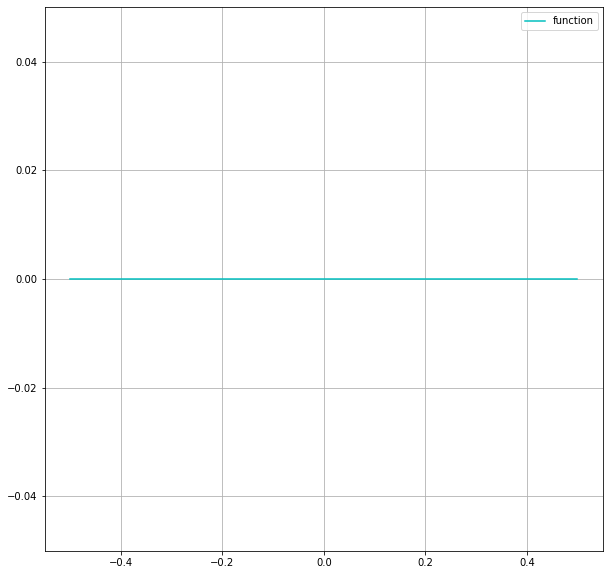

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(xv, fx, color = 'c', label = 'function')
plt.ylim(0, 1e-1000)
plt.grid()
plt.legend()
plt.show()

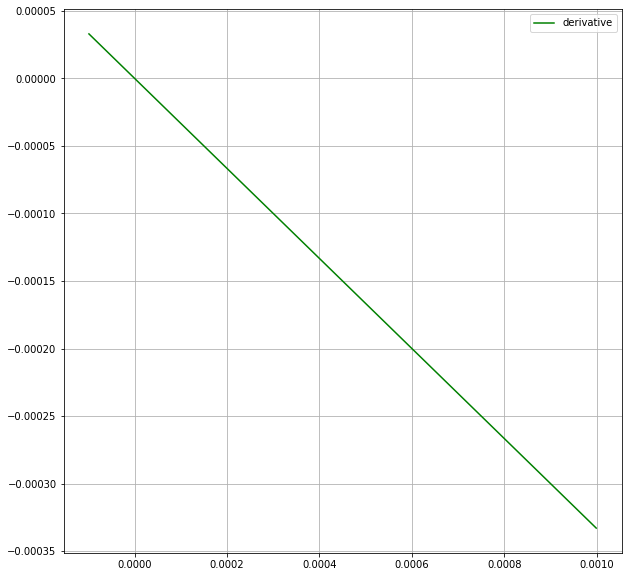

In [ ]:
plt.figure(figsize=(10, 10))
plt.label('График производной функции' + f_string)
plt.plot(xv, dfx, color = 'g', label = 'derivative')
plt.grid()
plt.legend()
plt.show()

"Встроенное" решение

In [ ]:
t0_in = time.time()

x = Symbol('x')
f = eval(f_string)
deriv_f = lambdify(x, f.diff(x))
dfx_embedded = [deriv_f(el) for el in xv]

t1_in = time.time()

In [ ]:
print(f'Если мы здесь, значит решение не умерло. Мое за {t1 - t0}, а встроенное за {t1_in - t0_in}')

Если мы здесь, значит решение не умерло. Мое за 4.009977579116821, а встроенное за 0.1414015293121338


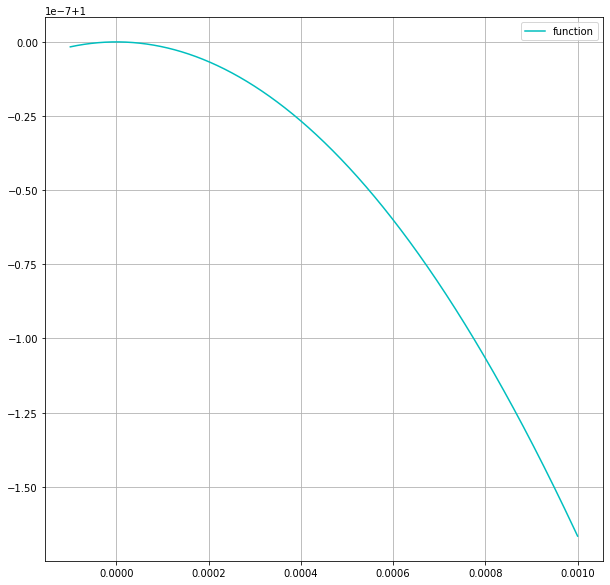

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(points[0], points[1], 100000), [func(el) for el in np.linspace(points[0], points[1], 100000)], color = 'c', label = 'function')
plt.grid()
plt.legend()
plt.show()

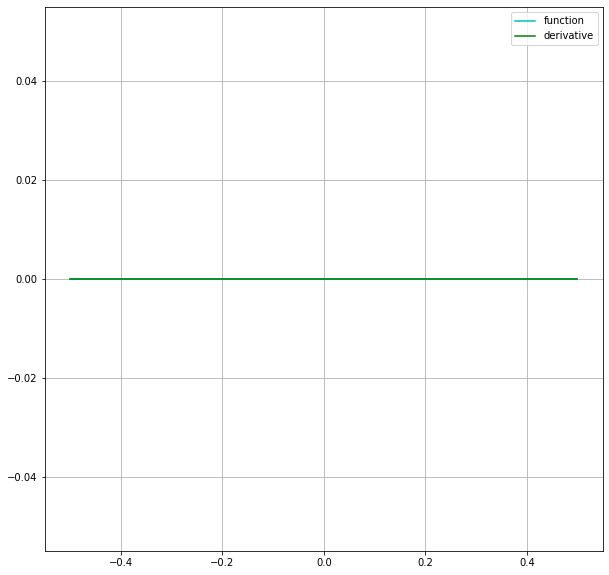

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(xv, dfx_embedded, color = 'g', label = 'derivative')
plt.grid()
plt.legend()
plt.show()

In [ ]:
initial_value = 1.0
visible_to_computer_difference = initial_value

while (initial_value + visible_to_computer_difference > initial_value):
    visible_to_computer_difference /= 2


print(f'Видимая компьютеру разница для стартого значения {initial_value} равна {visible_to_computer_difference}')
print(f'При этом значение даже для x = {0.0001} f(x) = {func(0.0001)} ')
print('Компьютеру просто не видна эта разница. Он не чувствителен к таким маленьким числам')

Видимая компьютеру разница для стартого значения 1.0 равна 1.1102230246251565e-16
При этом значение даже для x = 0.0001 f(x) = 0.999000499833375 
Компьютеру просто не видна эта разница. Он не чувствителен к таким маленьким числам
